<a href="https://colab.research.google.com/github/Salva13s/opti/blob/main/genetico_opti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Solucion Correcta!
Solucion Correcta!
Solucion Correcta!
Solucion Correcta!
Solucion Correcta!
Solucion Correcta!
Solucion Correcta!
Solucion Correcta!
Solucion Correcta!
Solucion Correcta!
Solucion Correcta!
Solucion Correcta!
Solucion Correcta!
Solucion Correcta!
Solucion Correcta!
Solucion Correcta!
Solucion Correcta!
Solucion Correcta!
Solucion Correcta!
Solucion Correcta!
Solucion Correcta!
Solucion Correcta!
Solucion Correcta!
Solucion Correcta!
Solucion Correcta!
Solucion Correcta!
Solucion Correcta!


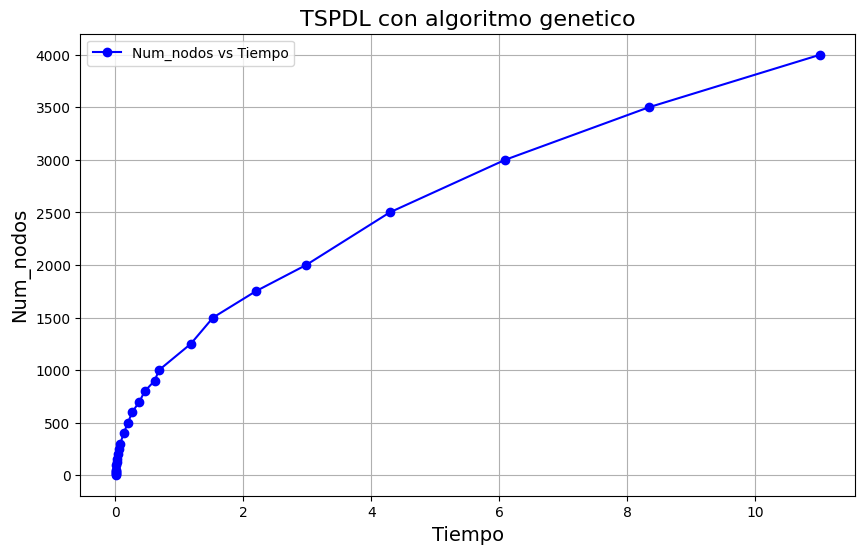

In [1]:
import math
import numpy as np
import random
import time
import matplotlib.pyplot as plt

def tspdl_algoritmo_genetico(distancias, limites_profundidad, capacidad_carga, cargas, puerto_inicio, poblacion_tamano, num_generaciones, prob_mutacion):
    num_ciudades = len(distancias)
    ciudades = [i for i in range(num_ciudades) if i != puerto_inicio]

    # Generar una población inicial de rutas aleatorias
    poblacion = generar_poblacion_inicial(ciudades, puerto_inicio, poblacion_tamano)

    for _ in range(num_generaciones):
        # Evaluar la aptitud de cada individuo en la población
        aptitudes = [evaluar_aptitud(ruta, distancias, limites_profundidad, capacidad_carga, cargas, puerto_inicio) for ruta in poblacion]

        # Seleccionar los mejores individuos para reproducirse
        seleccionados = seleccionar_individuos(poblacion, aptitudes)

        # Crear una nueva generación mediante cruces y mutaciones
        nueva_generacion = []

        while len(nueva_generacion) < poblacion_tamano:
            padre = random.choice(seleccionados)
            madre = random.choice(seleccionados)
            hijo = cruzar_individuos(padre, madre)
            hijo = mutar_individuo(hijo, prob_mutacion)
            nueva_generacion.append(hijo)

        poblacion = nueva_generacion

    # Seleccionar la mejor ruta de la última generación como resultado
    mejor_ruta = max(poblacion, key=lambda ruta: evaluar_aptitud(ruta, distancias, limites_profundidad, capacidad_carga, cargas, puerto_inicio))
    mejor_distancia = evaluar_aptitud(mejor_ruta, distancias, limites_profundidad, capacidad_carga, cargas, puerto_inicio)

    return mejor_ruta, mejor_distancia


def generar_poblacion_inicial(ciudades, puerto_inicio, poblacion_tamano):
    poblacion = []

    for _ in range(poblacion_tamano):
        ruta = random.sample(ciudades, len(ciudades))
        poblacion.append([puerto_inicio] + ruta + [puerto_inicio])

    return poblacion


def evaluar_aptitud(ruta, distancias, limites_profundidad, capacidad_carga, cargas, puerto_inicio):
    distancia_total = 0
    carga_actual = 0
    excede_limites = False

    for i in range(len(ruta) - 1):
        ciudad_actual = ruta[i]
        ciudad_siguiente = ruta[i + 1]

        if ciudad_siguiente != puerto_inicio:  # No recogemos carga si la siguiente ciudad es la de inicio
            carga_actual = min(cargas[ciudad_siguiente], capacidad_carga, limites_profundidad[ciudad_actual])

            if carga_actual < cargas[ciudad_siguiente]:
                excede_limites = True
                break

        distancia = distancias[ciudad_actual][ciudad_siguiente]
        distancia_total += distancia

    if excede_limites:
        return float('inf')

    return distancia_total



def seleccionar_individuos(poblacion, aptitudes):
    seleccionados = []

    suma_aptitudes = sum(aptitudes)

    if not math.isfinite(suma_aptitudes):
        # Si la suma de las aptitudes no es finita, seleccionamos aleatoriamente
        seleccionados = random.choices(poblacion, k=len(poblacion))
    else:
        # Seleccionamos los individuos según las aptitudes
        for _ in range(len(poblacion)):
            indice = random.choices(range(len(poblacion)), weights=aptitudes)[0]
            seleccionados.append(poblacion[indice])

    return seleccionados



def cruzar_individuos(padre, madre):
    # Operador de orden secuencial (OX)
    inicio, fin = sorted(random.sample(range(1, len(padre) - 1), 2))
    hijo_intermedio = madre[inicio:fin]
    hijo = [None] * len(padre)
    hijo[inicio:fin] = hijo_intermedio
    ciudades_padre = [ciudad for ciudad in padre if ciudad not in hijo_intermedio]
    hijo = list(ciudades_padre[:inicio]) + hijo_intermedio + list(ciudades_padre[inicio:])
    return hijo


def mutar_individuo(individuo, prob_mutacion):
    # Operador de intercambio 2-opt
    if random.random() < prob_mutacion:
        inicio, fin = sorted(random.sample(range(1, len(individuo) - 1), 2))
        individuo[inicio:fin] = reversed(individuo[inicio:fin])
    return individuo


def verificar_solucion(distancias, profundidades, demandas, ciudad_inicio, ruta):
    n_ciudades = len(distancias)

    # El viaje debe comenzar y terminar en la misma ciudad
    if ruta[0] != ciudad_inicio or ruta[-1] != ciudad_inicio:
        return False

    # Cada ciudad solo puede ser visitada una vez (excepto la ciudad inicial/final)
    if len(ruta[1:-1]) != len(set(ruta[1:-1])):
        return False

    # Inicializar la carga del viajero con la demanda para la primera ciudad
    carga = demandas[ruta[1]]

    for i in range(1, len(ruta)):
        ciudad_actual = ruta[i]
        ciudad_anterior = ruta[i - 1]

        # La carga llevada por el viajero no debe superar el límite de la ciudad actual
        if carga > profundidades[ciudad_actual]:
            return False

        # Si no estamos en la ciudad final, preparar la carga para la próxima ciudad
        if i < len(ruta) - 1:
            carga = demandas[ruta[i + 1]]

    # Si llegamos hasta aquí, todas las comprobaciones fueron exitosas
    return True

valores_grafico = []
numero_ciudades = [5,10,20,30,40,50,100,125,150,200,250,300,400,500,600,700,800,900,1000,1250,1500,1750,2000,2500,3000,3500,4000]
for i in numero_ciudades:
    # Parámetros de entrada
    num_ciudades = i
    ciudad_inicio = 0
    capacidad_carga = 100

    matriz_distancias = np.triu(np.random.randint(10, 100, size=(num_ciudades, num_ciudades)), 1)
    matriz_distancias = matriz_distancias + matriz_distancias.T


    draft_limit = []
    for _ in range(num_ciudades):
        numero_aleatorio = random.randint(60, 100)
        draft_limit.append(numero_aleatorio)

    carga_ciudad = []
    for a in range(num_ciudades):
        numero_aleatorio = random.randint(1, draft_limit[a])
        carga_ciudad.append(numero_aleatorio)

    inicio_tiempo = time.time()
    ruta_optima, distancia_optima = tspdl_algoritmo_genetico(matriz_distancias, draft_limit, capacidad_carga, carga_ciudad,ciudad_inicio,15,20,30)
    tiempo_total = time.time() - inicio_tiempo

    sol = verificar_solucion(matriz_distancias, draft_limit, carga_ciudad, ciudad_inicio, ruta_optima)
    if (sol == True):
        print("Solucion Correcta!")
    else:
        print("Solución no funciona!")

    valores_grafico.append((tiempo_total, num_ciudades))



    #print("Matriz de distancia entre ciudades\n",matriz_distancias)
    #print("Limite de profundidad de cada ciudad\n",draft_limit)
    #print("DEmanda de cada ciudad\n",carga_ciudad)
    #print("Ciudad de inicio del viajante\n",ciudad_inicio)
    # Resolver el problema y medir el tiempo de ejecución



#inicio_tiempo = time.time()
#ruta_optima, distancia_optima = tspdl_algoritmo_genetico(matriz_distancias, draft_limit, capacidad_carga, carga_ciudad,ciudad_inicio,15,20,30)
#tiempo_total = time.time() - inicio_tiempo


# Imprimir resultados
#print("Cantidad de ciudades:", num_ciudades)
#print("Tiempo de ejecución:", tiempo_total, "segundos")
#print("Ruta óptima:", ruta_optima)
#print("Distancia óptima:", distancia_optima)

#sol = verificar_solucion(matriz_distancias, draft_limit, carga_ciudad, ciudad_inicio, ruta_optima)
#if (sol == True):
#    print("Solucion Correcta!")
#else:
#    print("Solución no funciona!")


tiempo = [row[0] for row in valores_grafico]
num_nodos = [row[1] for row in valores_grafico]

# Creamos el gráfico
plt.figure(figsize=(10,6))  # Tamaño de la figura
plt.plot(tiempo, num_nodos, marker='o', linestyle='-', color='b')  # Agregamos marcadores, línea y color

# Nombramos los ejes
plt.xlabel('Tiempo', fontsize=14)  # Tamaño de la fuente
plt.ylabel('Num_nodos', fontsize=14)  # Tamaño de la fuente

# Añadimos título y aumentamos el tamaño de la fuente
plt.title("TSPDL con algoritmo genetico", fontsize=16)

# Añadimos una grilla para facilitar la lectura
plt.grid(True)

# Añadimos una leyenda
plt.legend(['Num_nodos vs Tiempo'], loc='upper left')

# Mostramos el gráfico
plt.show()







